In [15]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
import folium

output_notebook()

# Cargamos algunos datasets de ejemplo
iris=pd.read_csv('iris.csv')
tips = pd.read_csv('tips.csv')

Loading BokehJS ...

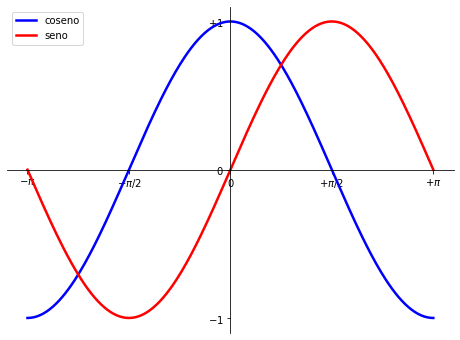

In [16]:
# Ejemplo matplotlib
# graficanco funciones seno y coseno
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# configurando el tamaño de la figura
plt.figure(figsize=(8, 6))
# dibujando las curvas
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="coseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")
# personalizando los valores de los ejes
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])
# agregando la leyenda
plt.legend(loc='upper left')
# moviendo los ejes de coordenadas
ax = plt.gca()  # get current axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
# mostrando el resultado
plt.show()

In [17]:
# Ejemplo con iris
# histograma de Petal.Length
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
# separo en especies
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']


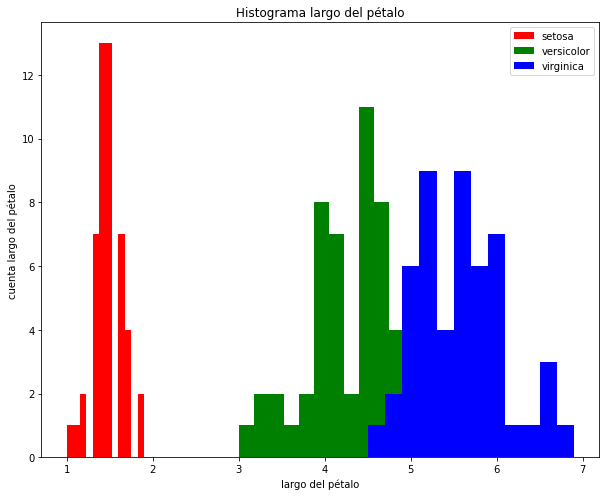

In [19]:
# crear histograma
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(setosa['petal_length'], 12, facecolor='red', label='setosa')
n, bins, patches = plt.hist(versicolor['petal_length'], 12, facecolor='green', label='versicolor')
n, bins, patches = plt.hist(virginica['petal_length'], 12,  facecolor='blue', label='virginica')
plt.legend(loc='upper right')
plt.title('Histograma largo del pétalo')
plt.xlabel('largo del pétalo')
plt.ylabel('cuenta largo del pétalo')
plt.show()

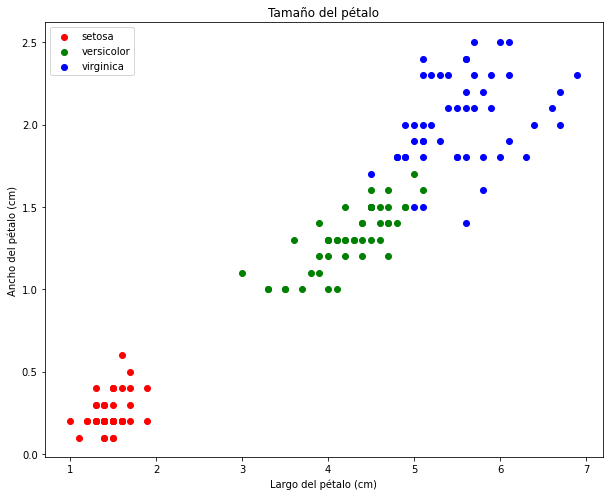

In [20]:
# Ejemplo diagrama de dispersion entre Petal.Length y Petal.Width
plt.figure(figsize=(10, 8))
plt.scatter(setosa['petal_length'], setosa['petal_width'], 
            c='red', label='setosa')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], 
            c='green', label='versicolor')
plt.scatter(virginica['petal_length'], virginica['petal_width'], 
            c='blue', label='virginica')
plt.title('Tamaño del pétalo')
plt.xlabel('Largo del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.legend(loc='upper left')
plt.show()

/home/kmp/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


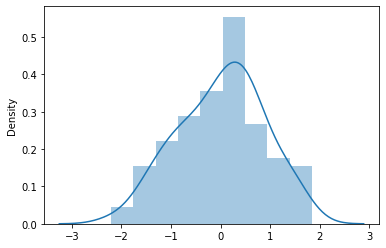

In [21]:
# Ejemplo gráfico de distribuciones
x = np.random.normal(size=100)
dist= sns.distplot(x)

In [22]:
# Ejemplo gráfico regresión con tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


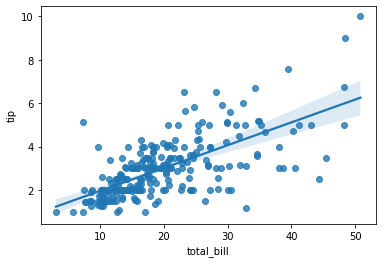

In [23]:
eg = sns.regplot(x="total_bill", y="tip", data=tips)

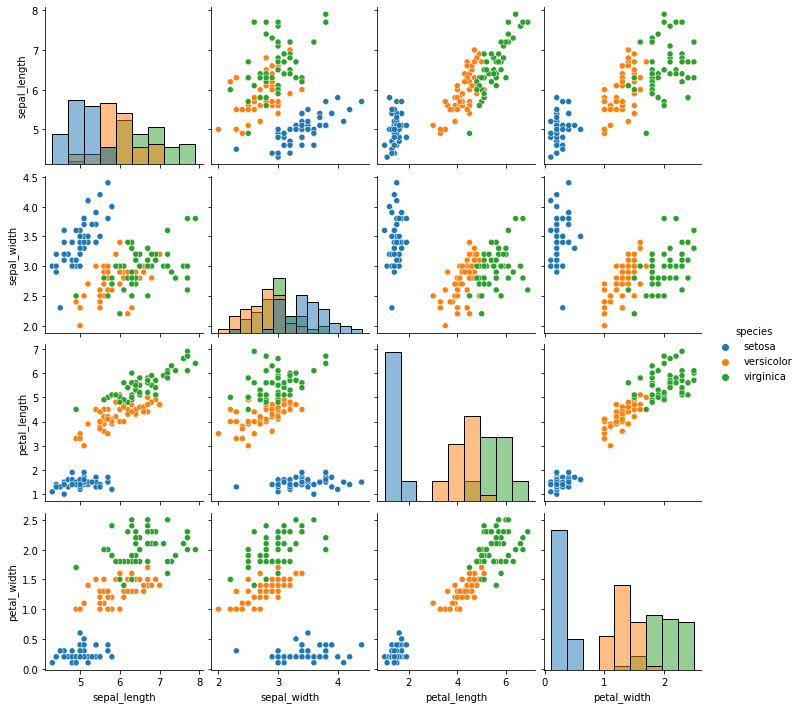

In [24]:
# Ejemplo pairplot con datase iris
g = sns.pairplot(iris, hue="species", diag_kind="hist")  



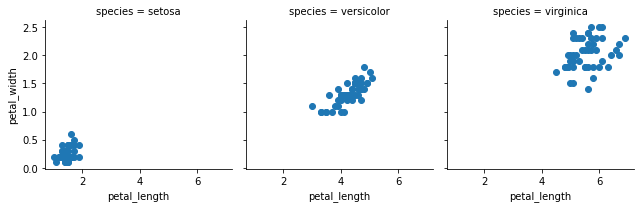

In [25]:
# Ejemplo FacetGrid con iris
g = sns.FacetGrid(iris, col="species")
g = g.map(plt.scatter, "petal_length", "petal_width")

In [26]:
# dataset de bicicleterías de Ciudad de Buenos Aires
# descargado desde https://data.buenosaires.gob.ar/dataset/bicicleterias
bici = pd.read_csv('bicicletas.csv', sep=';')
bici.head()

,ID,LAT,LNG,NOMBRE,DIRECCION,TELEFONO,EMAIL,WEB,MECANICA_S,HORARIO_DE,CALLE,ALTURA,DIRECCION_,BARRIO,COMUNA
0,1,-34.592305,-58.425688,BICICLETAS ARAOZ,ARAOZ 1458,011-4833-7887 / 011-4832-7704,INFO@BICICCLETASARAOZ.COM.AR,HTTP://WWW.BICICLETASARAOZ.COM.AR/,True,LUN A VIER DE 9.30 A 19,ARAOZ,1458,ARAOZ 1458,PALERMO,COMUNA 14
1,2,-34.581378,-58.425982,RODA2ORO,ORO 2305,4774-0403,RODA2ORO@GMAIL.COM,HTTP://WWW.RODA2ORO.COM/,False,LUN A VIER DE 10 A 13 Y DE 14.30 A 19 / SAB DE...,FRAY JUSTO SANTAMARIA DE ORO,2305,FRAY JUSTO SANTAMARIA DE ORO 2305,PALERMO,COMUNA 14
2,3,-34.653352,-58.415343,WALTER,LINCH 3914,4912-2738,WALTERBIKES-10@HOTMAIL.COM,NaN,False,NaN,LYNCH,3914,LYNCH 3914,NUEVA POMPEYA,COMUNA 4
3,4,-34.594351,-58.443244,BICI SHOP,VILLAROEL 1093,4855-8329,INFO@TUBICICLETERIA.COM,WWW.TUBICICLETERIA.COM,False,NaN,VILLARROEL,1093,VILLARROEL 1093,VILLA CRESPO,COMUNA 15
4,5,-34.608364,-58.377334,BICICLETERIAS EL COLO,RIVADAVIA 770,4342--3887,INFO@BICICLETERIAELCOLO.COM.AR,HTTP://WWW.BICICLETERIAELCOLO.COM.AR/,True,LUN A VIER DE 9 A 19/SAB DE 9 A 13,RIVADAVIA AV.,770,RIVADAVIA AV. 770,MONSERRAT,COMUNA 1


In [27]:

# filtramos solo las bicicleterías de palermo
bici_palermo = bici[bici.BARRIO == 'PALERMO'][['LAT', 'LNG', 'NOMBRE']]

In [28]:
# creamos el mapa con folium
mapa = folium.Map(location=[-34.588889, -58.430556], zoom_start=13)
mapa


In [29]:
 #agregamos los markers con el nombre de cada bicicletería.
for index, row in bici_palermo.iterrows():
    folium.CircleMarker([row['LAT'],row['LNG']], 
                   popup=row['NOMBRE'], color='red',
                   icon='info-sign').add_to(mapa)

In [30]:
# visualizamos el mapa con los markers
mapa